In [1]:
from LegoRL import *

In [2]:
import gym
env = gym.make('CartPole-v0').unwrapped

In [3]:
import torch.nn as nn
CartpoleNN = lambda input_size, output_size: nn.Sequential(
                nn.Linear(input_size, 20),
                nn.ReLU(),
                nn.Linear(20, output_size),
                nn.ReLU()
)

# DQN (without Target network)

In [4]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    replay     = ReplayBuffer(runner="runner"),
    sampler    = Sampler(replay="replay"),
    backbone   = Backbone(CartpoleNN, embedding_size=20),
    q_head     = QualityHead(backbone="backbone"),
    target     = OneStep(evaluator="q_head"),
    loss       = CriticLoss(sampler="sampler", critic="q_head", target="target"),
    trainer    = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [5]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([2])


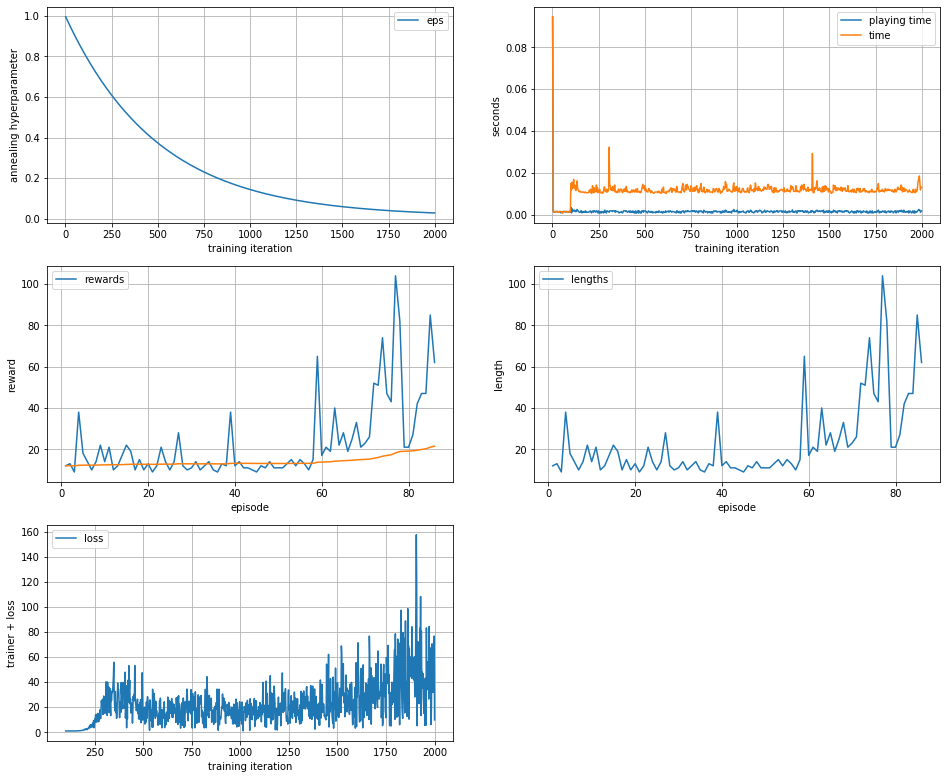

In [6]:
system.run(2000)

In [7]:
agent.runner.fps

86.10634944162211

# DQN

In [8]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="policy"),
    replay          = ReplayBuffer(runner="runner"),
    sampler         = Sampler(replay="replay"),
    backbone        = Backbone(CartpoleNN, embedding_size=20),
    q_head          = QualityHead(backbone="backbone"),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_head     = Frozen(QualityHead)(backbone="frozen_backbone", source="q_head"),
    target          = OneStep(evaluator="frozen_head"),
    loss            = CriticLoss(sampler="sampler", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
    policy          = eGreedy(greedy_policy="q_head"),
)

In [9]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([2])


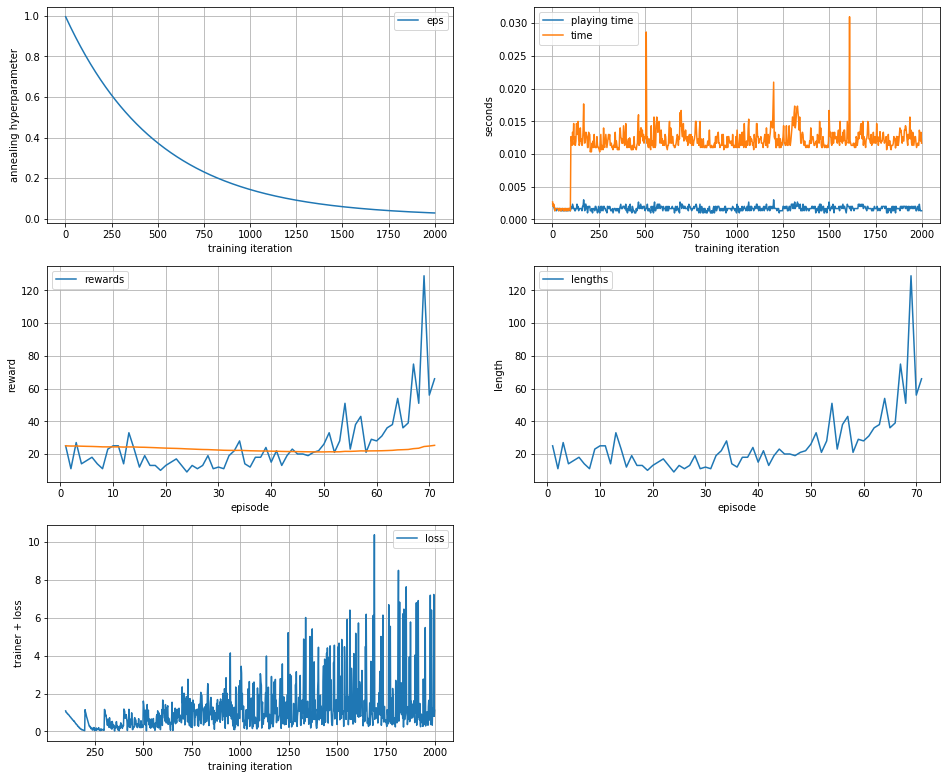

In [10]:
system.run(2000)

In [11]:
agent.runner.fps

84.55045549617049

# Double DQN

In [12]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="policy"),
    replay          = ReplayBuffer(runner="runner"),
    sampler         = Sampler(replay="replay"),
    backbone        = Backbone(CartpoleNN, embedding_size=20),
    q_head          = QualityHead(backbone="backbone"),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_head     = Frozen(QualityHead)(backbone="frozen_backbone", source="q_head"),
    double          = Double(selector="q_head", evaluator="frozen_head"),
    target          = OneStep(evaluator="double"),
    loss            = CriticLoss(sampler="sampler", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
    policy          = eGreedy(greedy_policy="q_head"),
)

In [13]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([2])


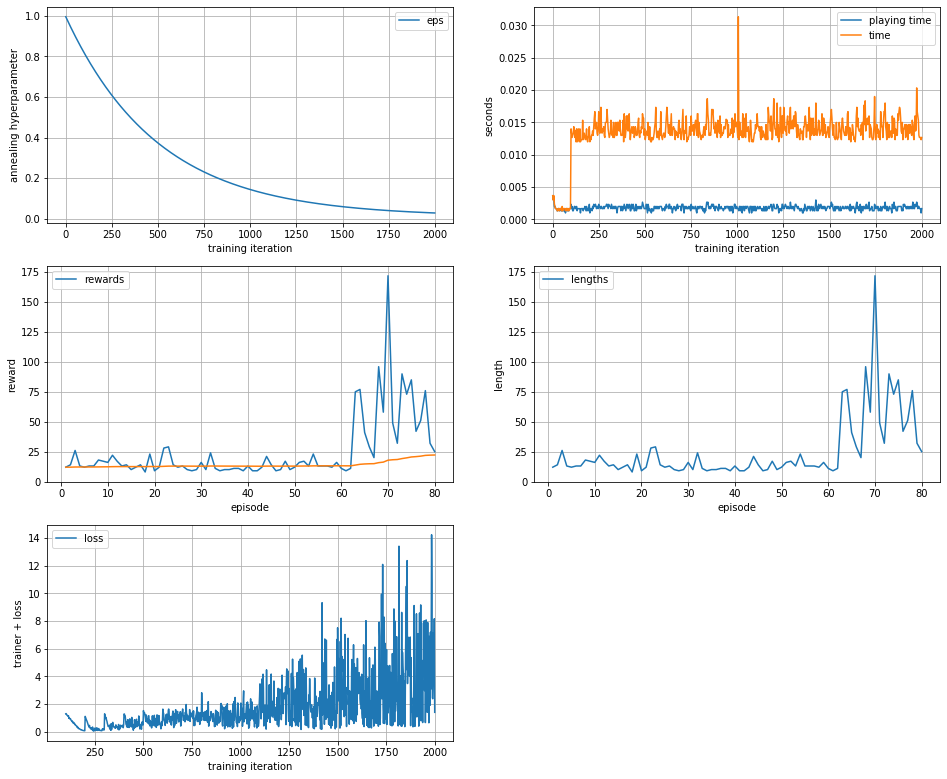

In [14]:
system.run(2000)

In [15]:
agent.runner.fps

74.51023110851321

# Dueling Double DQN

In [16]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="policy"),
    replay          = ReplayBuffer(runner="runner"),
    sampler         = Sampler(replay="replay"),
    backbone        = Backbone(CartpoleNN, embedding_size=20),
    v_head          = ValueHead(backbone="backbone"),
    q_head          = Dueling(backbone="backbone", value_head="v_head"),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_v_head   = Frozen(ValueHead)(backbone="frozen_backbone", source="v_head"),
    frozen_head     = Frozen(Dueling)(backbone="frozen_backbone", value_head="frozen_v_head", source="q_head"),
    double          = Double(selector="q_head", evaluator="frozen_head"),
    target          = OneStep(evaluator="double"),
    loss            = CriticLoss(sampler="sampler", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
    policy          = eGreedy(greedy_policy="q_head"),
)

In [17]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <v_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([2])


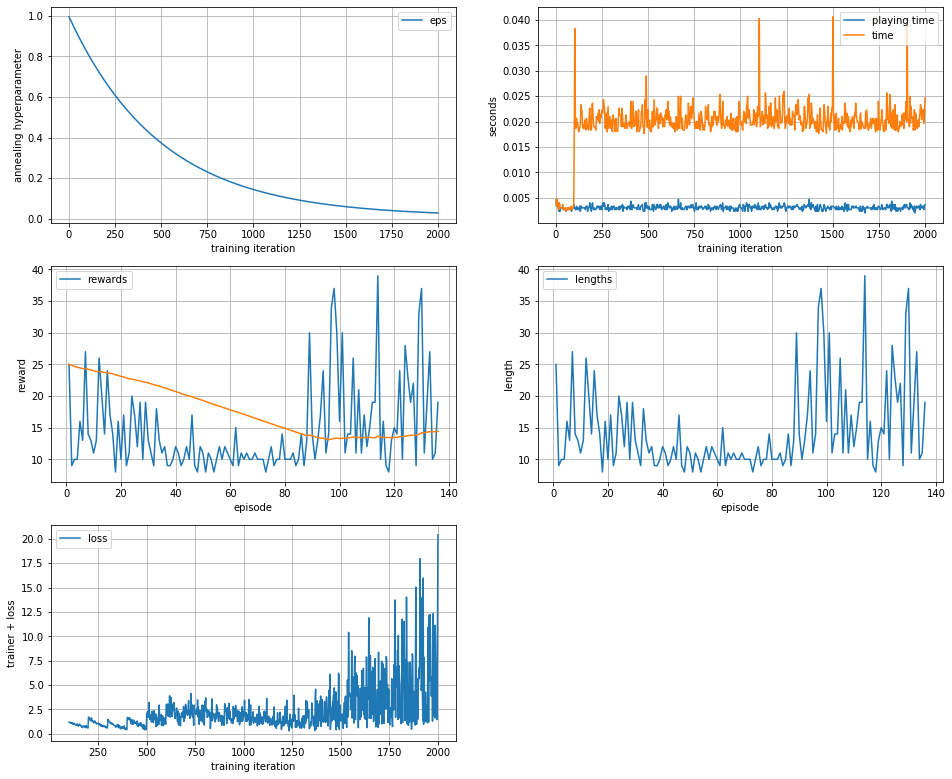

In [18]:
system.run(2000)

In [19]:
agent.runner.fps

51.05985372826083

# Dueling Double DQN with PrioritizedReplay

In [20]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="policy"),
    replay          = ReplayBuffer(runner="runner"),
    sampler         = PrioritizedSampler(replay="replay"),
    corrected       = SamplerBiasCorrection(sampler="sampler"),
    updater         = PrioritiesUpdater(sampler="sampler", priority_provider="loss"),
    backbone        = Backbone(CartpoleNN, embedding_size=20),
    v_head          = ValueHead(backbone="backbone"),
    q_head          = Dueling(backbone="backbone", value_head="v_head"),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_v_head   = Frozen(ValueHead)(backbone="frozen_backbone", source="v_head"),
    frozen_head     = Frozen(Dueling)(backbone="frozen_backbone", value_head="frozen_v_head", source="q_head"),
    double          = Double(selector="q_head", evaluator="frozen_head"),
    target          = OneStep(evaluator="double"),
    loss            = CriticLoss(sampler="corrected", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
    policy          = eGreedy(greedy_policy="q_head"),
)

In [21]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <v_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([2])


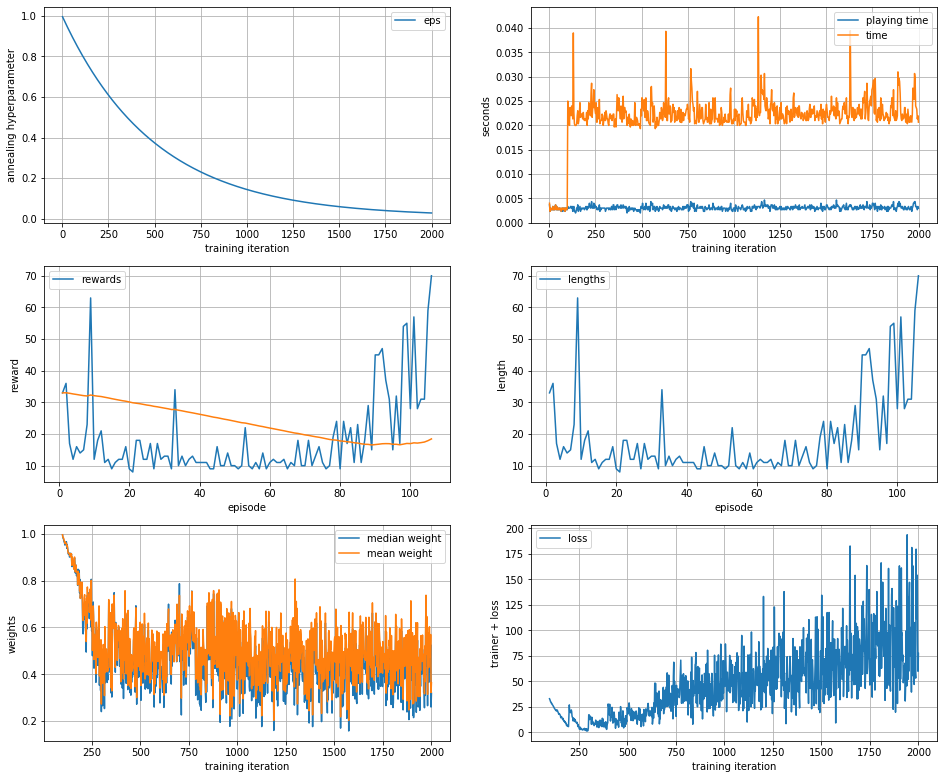

In [22]:
system.run(2000)

In [23]:
agent.runner.fps

46.15499761734117

# N-step Dueling Double DQN with PrioritizedReplay

In [24]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="policy"),
    latency         = NstepLatency(runner="runner"),
    replay          = ReplayBuffer(runner="latency"),
    sampler         = PrioritizedSampler(replay="replay"),
    corrected       = SamplerBiasCorrection(sampler="sampler"),
    updater         = PrioritiesUpdater(sampler="sampler", priority_provider="loss"),
    backbone        = Backbone(CartpoleNN, embedding_size=20),
    v_head          = ValueHead(backbone="backbone"),
    q_head          = Dueling(backbone="backbone", value_head="v_head"),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_v_head   = Frozen(ValueHead)(backbone="frozen_backbone", source="v_head"),
    frozen_head     = Frozen(Dueling)(backbone="frozen_backbone", value_head="frozen_v_head", source="q_head"),
    double          = Double(selector="q_head", evaluator="frozen_head"),
    target          = OneStep(evaluator="double"),
    loss            = CriticLoss(sampler="corrected", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
    policy          = eGreedy(greedy_policy="q_head"),
)

In [25]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <v_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([2])


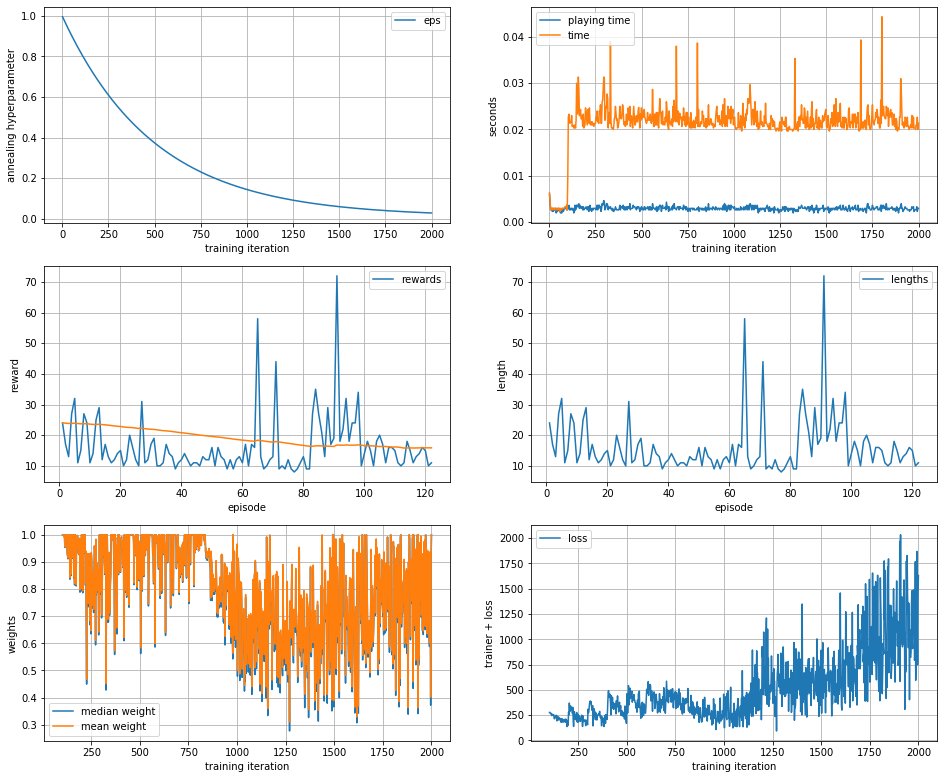

In [26]:
system.run(2000)

In [27]:
agent.runner.fps

46.934798995421914

# Noisy N-step Dueling Double DQN with PrioritizedReplay

In [28]:
NoisyCartpoleNN = lambda input_size, output_size: nn.Sequential(
                NoisyLinear()(input_size, 20),
                nn.ReLU(),
                NoisyLinear()(20, output_size),
                nn.ReLU()
)

In [29]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="q_head"),
    latency         = NstepLatency(runner="runner"),
    replay          = ReplayBuffer(runner="latency"),
    sampler         = PrioritizedSampler(replay="replay"),
    corrected       = SamplerBiasCorrection(sampler="sampler"),
    updater         = PrioritiesUpdater(sampler="sampler", priority_provider="loss"),
    backbone        = Backbone(NoisyCartpoleNN, embedding_size=20),
    v_head          = ValueHead(backbone="backbone", network=NoisyLinear()),
    q_head          = Dueling(backbone="backbone", network=NoisyLinear(), value_head="v_head"),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_v_head   = Frozen(ValueHead)(backbone="frozen_backbone", source="v_head"),
    frozen_head     = Frozen(Dueling)(backbone="frozen_backbone", value_head="frozen_v_head", source="q_head"),
    double          = Double(selector="q_head", evaluator="frozen_head"),
    target          = OneStep(evaluator="double"),
    loss            = CriticLoss(sampler="corrected", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
)

In [30]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <v_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([2])


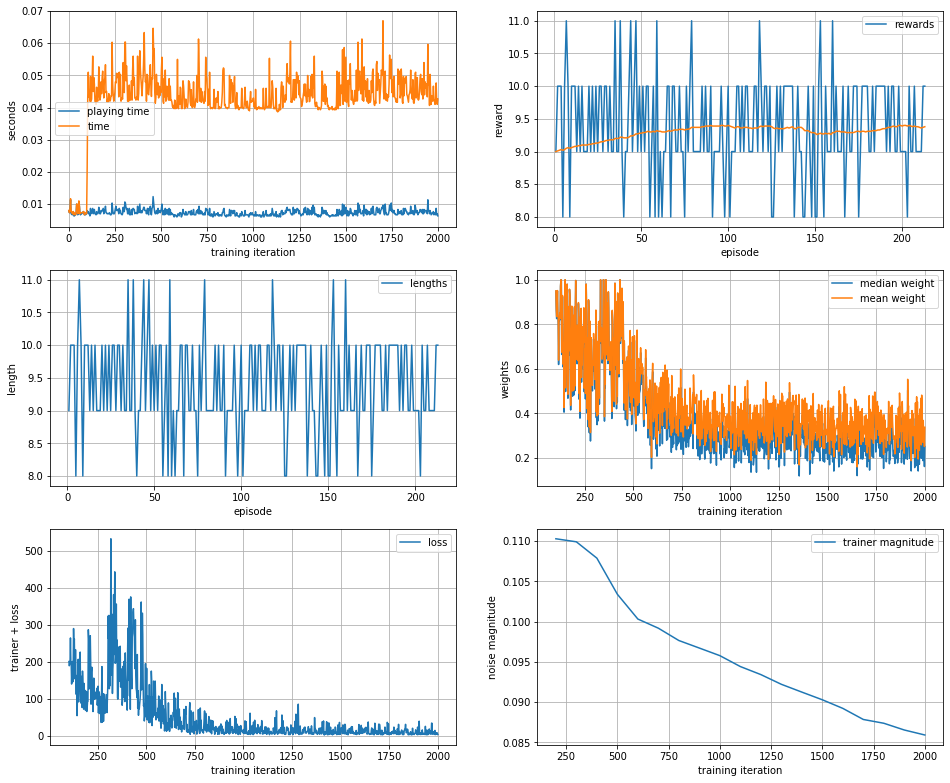

In [31]:
system.run(2000)

In [32]:
agent.runner.fps

23.31056762509098

# Categorical DQN (also known as c51)

In [33]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="policy"),
    replay          = ReplayBuffer(runner="runner"),
    sampler         = Sampler(replay="replay"),
    backbone        = Backbone(CartpoleNN, embedding_size=20),
    q_head          = QualityHead(backbone="backbone", representation=Categorical(Q, -10, 10, 51)),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_head     = Frozen(QualityHead)(backbone="frozen_backbone", source="q_head"),
    target          = OneStep(evaluator="frozen_head"),
    loss            = CriticLoss(sampler="sampler", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
    policy          = eGreedy(greedy_policy="q_head"),
)

In [34]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([51, 2])


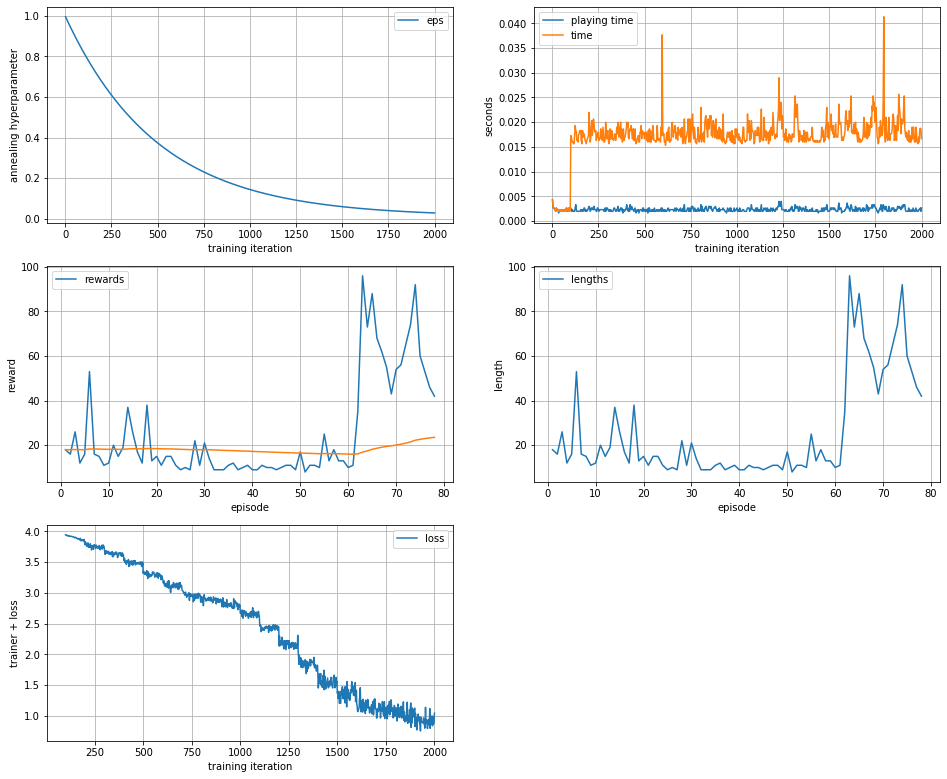

In [35]:
system.run(2000)

In [36]:
agent.runner.fps

58.110974231708305

# Rainbow DQN

In [37]:
agent = Composed(
    visualizer      = Visualizer(),
    runner          = Runner(policy="q_head"),
    latency         = NstepLatency(runner="runner"),
    replay          = ReplayBuffer(runner="latency"),
    sampler         = PrioritizedSampler(replay="replay"),
    corrected       = SamplerBiasCorrection(sampler="sampler"),
    updater         = PrioritiesUpdater(sampler="sampler", priority_provider="loss"),
    backbone        = Backbone(NoisyCartpoleNN, embedding_size=20),
    v_head          = ValueHead(backbone="backbone", network=NoisyLinear(), representation=Categorical(V, -10, 10, 51)),
    q_head          = Dueling(backbone="backbone", network=NoisyLinear(), value_head="v_head", representation=Categorical(Q, -10, 10, 51)),
    frozen_backbone = Frozen(Backbone)(source="backbone"),
    frozen_v_head   = Frozen(ValueHead)(backbone="frozen_backbone", source="v_head"),
    frozen_head     = Frozen(Dueling)(backbone="frozen_backbone", value_head="frozen_v_head", source="q_head"),
    double          = Double(selector="q_head", evaluator="frozen_head"),
    target          = OneStep(evaluator="double"),
    loss            = CriticLoss(sampler="corrected", critic="q_head", target="target"),
    trainer         = Trainer(transformations=["backbone", "q_head"], losses=["loss"]),
)

In [38]:
system = System(agent, env)

Initializing <backbone>:
  Input shape is torch.Size([4])
  Output shape is torch.Size([20])
Initializing <v_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([51])
Initializing <q_head>:
  Input shape is torch.Size([20])
  Output shape is torch.Size([51, 2])


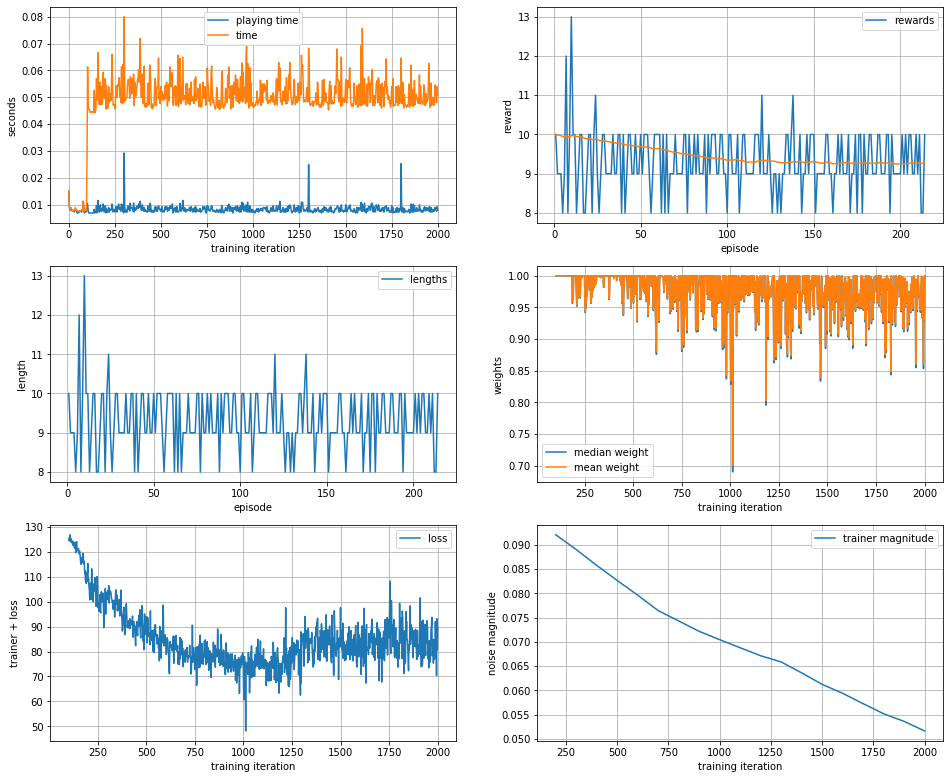

In [39]:
system.run(2000)

In [40]:
agent.runner.fps

20.33867357851492

### All modules description:

In [41]:
agent

<visualizer>: Plots logs every 100 iteration
<runner>: Makes one step in 1 parallel environments each 1 iteration using <q_head>
<latency>: Substitutes stream from <runner> to 3-step transitions
<replay>: Stores observations from <latency>
<sampler>: Samples mini-batch from <replay> using priorities
<corrected>: Adds weights to mini-batches from <sampler> to correct bias
<updater>: Updates priorities of <sampler> using priorities from <loss>
<backbone>: Feature extractor network
<v_head>: Head, connected to <backbone>, modeling CategoricalValue
<q_head>: Head, connected to <backbone>, modeling CategoricalValue in dueling form (V + A - A.mean()) where V comes from <v_head>
<frozen_backbone>: Copy of <backbone>, updated each 100 iteration
<frozen_v_head>: Copy of <v_head>, updated each 100 iteration
<frozen_head>: Copy of <q_head>, updated each 100 iteration
<double>: Evaluates value as Q from <frozen_head> of actions selected by <q_head>
<target>: Calculates one-step TD target using <do